/tmp/ipykernel_4011501/1699453429.py:22: ResourceWarning: unclosed file <_io.BufferedReader name='./result/Latent/outdoor/model.pickle'>
  model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))


['Skiing' 'Rafting' 'Cycling' 'Ice Skating' 'Surfing' 'Snowboarding']


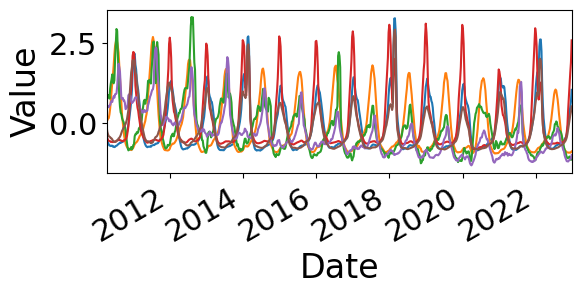

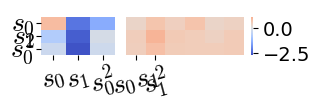

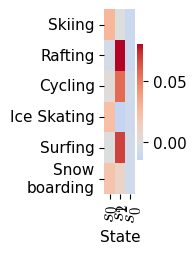

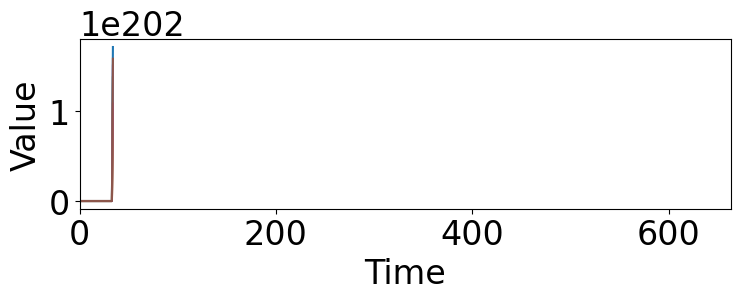

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.stats
import seaborn as sns
import scipy
from model import NLDS, plot_result, make_data
from model.utils import make_feature_names
import pandas as pd
import matplotlib.dates as mdates
%matplotlib inline

dataset_name = 'outdoor'
dir_path = f'./result/Latent/{dataset_name}'
fig_type = 'pdf'
fsize = 2.4
annot = False

df = pd.read_csv("./dataset/googletrends/outdoor_7.csv",  index_col=0, parse_dates=True)
df = df[(df.index <= "2022-12-25") & (df.index >= "2010-04-05")]
model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))
w = scipy.stats.zscore(np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1), axis=1)
# w = np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1)

data, setting = make_data(dataset_name)
xticklabels = ['$s_0$','$s_1$','$s_0^2$','$s_0s_1$', '$s_1^2$'] #make_feature_names(model.k, model.dim_poly)
yticklabels = setting['yticklabels']
print(yticklabels)
yticklabels[-1] = 'Snow\nboarding'
slabels=xticklabels
vmin = np.min(w) - 0.1
vmax = np.max(w) + 0.1

df = pd.DataFrame(data=data, index=df.index, columns=setting['yticklabels'])
plt.rcParams["font.size"] = 22
fig, ax = plt.subplots(figsize=(6.0, 2.4))
fig.autofmt_xdate()
ax.plot(df.index, df)
locator = mdates.AutoDateLocator(minticks=5, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.set_xlim([df.index[0], df.index[-1]])
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
# ax.set_xlabel(df['date'].values)
# ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Date", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 14
size = 20
plt.rcParams['mathtext.fontset'] = 'cm'
fig, (ax1, ax2) = plt.subplots(1, 2, 
                                gridspec_kw=dict(width_ratios=[1,2], height_ratios=[1], wspace=0.1, hspace=0.3),
                                figsize=(3.0, 0.5))
sns.heatmap(w[:,:model.k], 
            xticklabels=slabels[:model.k],
            yticklabels=slabels[:model.k], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax1.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax1.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax1.tick_params(pad=0.5)

sns.heatmap(w[:,model.k:], 
            xticklabels=slabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot)
ax2.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax2.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax2.tick_params(pad=0.5)
fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 11
plt.rcParams['mathtext.fontset'] = 'cm'
plt.figure(figsize=(0.5, fsize))
sns.heatmap(model.C, 
            xticklabels=xticklabels[:model.k], 
            yticklabels=yticklabels, 
            cmap='coolwarm', fmt ='1.1e', center=0.0)
plt.xticks(fontsize = 15)
plt.xlabel("State")
plt.savefig(f"./{dir_path}/group.{fig_type}", bbox_inches='tight', pad_inches=0.1)


Sta, Obs = model.gen()
plt.rcParams["font.size"] = 24
data_no_noise, setting = make_data(dataset_name, noise_ratio=0.0)
fig, ax = plt.subplots(figsize=(8.4, 2.2))
# ax.plot(data_no_noise, figure=fig, color='lightgrey', linewidth=5)
ax.plot(Obs)
# ax.plot(Obs)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/state.{fig_type}", bbox_inches='tight', pad_inches=0.1)

In [3]:
Obs

array([[-0.18340771, -0.18981803, -0.41544849, -0.09550954, -0.69884851,
        -0.33750617],
       [-0.22833505, -0.14790192, -0.40124808, -0.13691098, -0.69172788,
        -0.37463487],
       [-0.25902134, -0.11970984, -0.39306389, -0.16473356, -0.68868419,
        -0.40049968],
       ...,
       [        nan,         nan,         nan,         nan,         nan,
                nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan]])

In [24]:
model.iter

6

In [28]:
model.d

array([-0.04714788, -0.21159609, -0.22411317,  0.09515103, -0.34333413,
       -0.12553346])

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model import NLDS, plot_result, make_data
from model.utils import make_feature_names

dataset_name = 'halvorsen'
dir_path = f'./result/Robust/{dataset_name}'
fig_type = 'pdf'
fsize = 4.0
annot = False

data, setting = make_data(dataset_name, noise_ratio=0.5)
model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))
w = np.concatenate((model.C @ (model.A - np.eye(model.k)), model.C @ model.F), axis=1)/setting['dt']

xticklabels = setting['xticklabels']
yticklabels = setting['yticklabels']
slabels=['$s_0$','$s_1$','$s_2$', '$s_0^2$','$s_0s_1$','$s_0s_2$','$s_1^2$','$s_1s_2$','$s_2^2$']
gt_org = setting['gt']
k_org = setting['C_org'].shape[1]
vmin = np.min(gt_org) - 0.1
vmax = np.max(gt_org) + 0.1

plt.rcParams["font.size"] = 24
fig, ax = plt.subplots(figsize=(8.4, 2.0))
ax.plot(data, figure=fig)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 16
size = 20
plt.rcParams['mathtext.fontset'] = 'cm'
fig, (ax1, ax2, axb, ax3, ax4) = plt.subplots(1, 5, 
                                gridspec_kw=dict(width_ratios=[1.0,3.2,0.2,1.0,3.2], height_ratios=[1], wspace=0.2, hspace=0.3),
                                figsize=(fsize*2, 1.0))
sns.heatmap(w[:,:model.k], 
            xticklabels=slabels[:model.k],
            yticklabels=slabels[:model.k], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax1.tick_params(axis = 'x', labelrotation = 30, labelsize=size)
ax1.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax1.tick_params(pad=0.5)

sns.heatmap(gt_org[:,model.k:], 
            xticklabels=slabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot, cbar=None)
ax2.tick_params(axis = 'x', labelrotation = 30, labelsize=size)
ax2.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax2.tick_params(pad=0.5)
# fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)

# plt.rcParams["font.size"] = 16
# size = 16
# plt.rcParams['mathtext.fontset'] = 'cm'
# fig, (ax1, ax2) = plt.subplots(1, 2, 
#                                 gridspec_kw=dict(width_ratios=[1.0,3], height_ratios=[1], wspace=0.1, hspace=0.3),
#                                 figsize=(fsize, 1.2))
sns.heatmap(gt_org[:,:model.k], 
            xticklabels=xticklabels[:model.k],
            yticklabels=xticklabels[:model.k], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax3, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax3.tick_params(axis = 'x', labelrotation = 30, labelsize=size)
ax3.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax3.tick_params(pad=0.5)

sns.heatmap(gt_org[:,model.k:], 
            xticklabels=xticklabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax,
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax4, annot=annot)
ax4.tick_params(axis = 'x', labelrotation = 30, labelsize=size)
ax4.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax4.tick_params(pad=0.5)
axb.set_visible(False)
# fig.savefig(f"./{dir_path}/ground_truth.{fig_type}", bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)


vanderpol -> #1
cubic -> #2
halvorsen -> #3
rucklidge -> #4
hopf -> #5


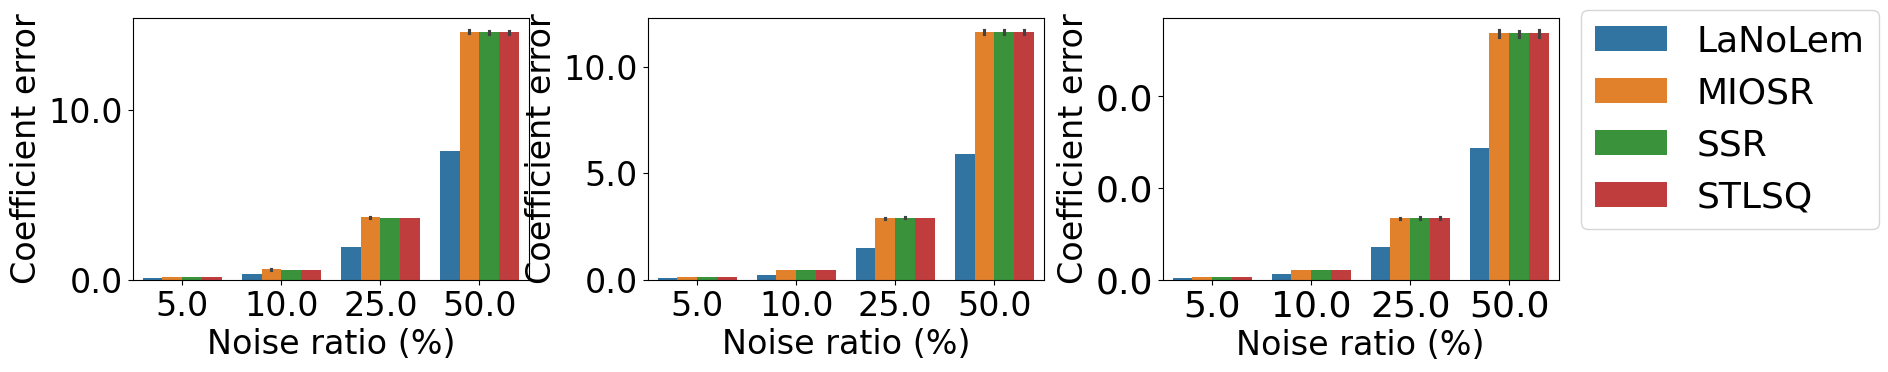

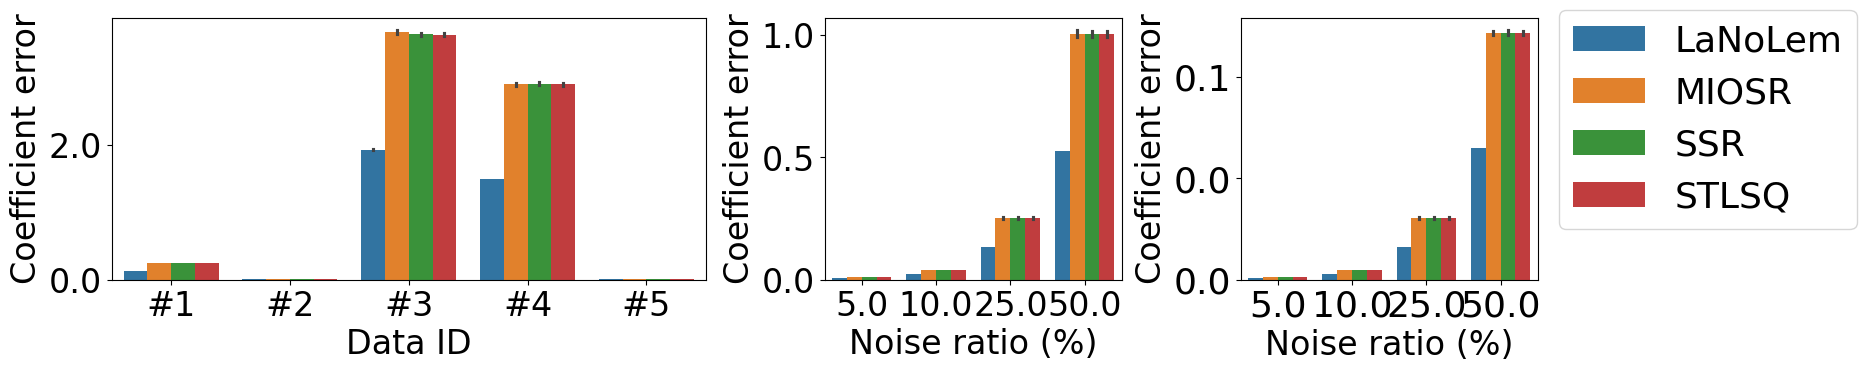

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./result/SI/SI_Errs_syn_all_20240725.csv')
j = 0
fsize = 8.0
order = []
for i in ['vanderpol', 'cubic', 'halvorsen', 'rucklidge', 'hopf']:
    print(f'{i} -> #{j+1}')
    # if i == 'lotka_volterra': continue
    df.replace({'data_name': {i: f"#{j+1}"}}, inplace=True)
    order.append(f"#{j+1}")
    j+=1
    
hue_order = ['LaNoLem', 'MIOSR', 'SSR', 'STLSQ']
# metrics = 'Coefficient err'
metrics = 'Prediction err'
df.loc[:, 'noise_ratio'] *= 100
    
plt.rcParams["font.size"] = 24
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                gridspec_kw=dict(width_ratios=[1.0,1.0,1.0], height_ratios=[1], wspace=0.3, hspace=1.1),
                                figsize=(fsize*2.3, 3.4))

ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax3.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

for ax, d_id in zip([ax1,ax2,ax3], ['#3', '#4', '#5']):
    sns.barplot(data=df[(df['data_name'] == d_id) & (df['noise_ratio'] > 1.0) & (df['noise_ratio'] <= 50)], y=metrics, x='noise_ratio', hue='method', ax=ax, hue_order=hue_order, legend=None)
    ax.set_ylabel("Coefficient error",fontsize=24)
    ax.set_xlabel("Noise ratio (%)",fontsize=24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

plt.legend(loc='upper left',bbox_to_anchor=(1.01,1.1),fontsize=26)
fig.savefig(f"./result/SI/si_err_all_ap_0521.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()


plt.rcParams["font.size"] = 24
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                gridspec_kw=dict(width_ratios=[2.2,1.1,1.1], height_ratios=[1], wspace=0.3, hspace=1.1),
                                figsize=(fsize*2.3, 3.4))

ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax3.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# plt.figure(figsize=(6.4,2.4))
sns.barplot(data=df[(df['noise_ratio'] == 25)], y=metrics, x='data_name', hue='method', ax=ax1, legend=None, order=order, hue_order=hue_order)
ax1.set_ylabel("Coefficient error",fontsize=24)
ax1.set_xlabel("Data ID",fontsize=24)

sns.barplot(data=df[(df['data_name'] == '#1') & (df['noise_ratio'] > 1.0) & (df['noise_ratio'] <= 50)], y=metrics, x='noise_ratio', hue='method', ax=ax2, hue_order=hue_order, legend=None)
ax2.set_ylabel("Coefficient error",fontsize=24)
ax2.set_xlabel("Noise ratio (%)",fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

sns.barplot(data=df[(df['data_name'] == '#2') & (df['noise_ratio'] > 1.0) & (df['noise_ratio'] <= 50)], y=metrics, x='noise_ratio', hue='method', ax=ax3, hue_order=hue_order)
ax3.set_ylabel("Coefficient error",fontsize=24)
ax3.set_xlabel("Noise ratio (%)",fontsize=24)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='upper left',bbox_to_anchor=(1.01,1.1),fontsize=26)
fig.savefig(f"./result/SI/si_syn_{metrics}_0725.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
df[df['data_name'] == '#3']

In [ ]:
df

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model import NLDS, plot_result, make_data
from sklearn import preprocessing
from model.utils import make_feature_names

dataset_name = 'vanderpol'
dir_path = f'./result/Latent/{dataset_name}'
fig_type = 'pdf'
fsize = 2.4
annot = False

model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))
data, setting = make_data(dataset_name, latent=True, noise_ratio=0.01)
w = np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1)/setting['dt']
# abs_w = np.abs(w)

# w = np.sign(w) * np.maximum(abs_w - np.max(abs_w)*0.01, 0.0)

# ss = preprocessing.StandardScaler()
# w = ss.fit_transform(np.abs(w.T)).T
xticklabels = setting['xticklabels']
yticklabels = setting['yticklabels']
slabels=['$s_0$','$s_1$','$s_0^2$','$s_0s_1$', '$s_1^2$','$s_0^3$','$s_0^2s_1$','$s_0s_1^2$','$s_1^3$']
vmin = np.min(w) - 0.1
vmax = np.max(w) + 0.1

plt.rcParams["font.size"] = 24
fig, ax = plt.subplots(figsize=(6.0, 1.8))
ax.plot(data, figure=fig)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 12
size = 16
plt.rcParams['mathtext.fontset'] = 'cm'
fig, (ax1, ax2) = plt.subplots(1, 2, 
                                gridspec_kw=dict(width_ratios=[1,2], height_ratios=[1], wspace=0.1, hspace=0.3),
                                figsize=(fsize, 0.7))
sns.heatmap(w[:,:model.k], 
            xticklabels=slabels[:model.k],
            yticklabels=slabels[:model.k], vmin=vmin, vmax=vmax, square=True, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax1.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax1.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax1.tick_params(pad=0.5)

sns.heatmap(w[:,model.k:], 
            xticklabels=slabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax, square=True, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot)
ax2.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax2.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax2.tick_params(pad=0.5)
fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 11
plt.rcParams['mathtext.fontset'] = 'cm'
plt.figure(figsize=(0.7, fsize))
sns.heatmap(model.C, 
            xticklabels=xticklabels[:model.k], 
            yticklabels=yticklabels, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, square=True)
plt.xticks(fontsize = 15)
plt.xlabel("State")
plt.savefig(f"./{dir_path}/group.{fig_type}", bbox_inches='tight', pad_inches=0.1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./result/SI/SI_Errs_syn_all_20240719.csv')

# for name, group in df.groupby('data_name'):
#     print(name)
#     sns.barplot(data=group[group['noise_ratio'] >= 0.1], y='mse', x='noise_ratio', hue='method')
#     # plt.yscale('log')
#     plt.show()
df = df[(df['noise_ratio'] <= 0.5)]
j = 0
fsize = 8.0
df1 = df.copy(deep=False) 
for i in ['rucklidge', 'halvorsen', 'lotka_volterra', 'rossler', 'vanderpol', 'cubic', 'hopf']:
    print(f'{i} -> #{j+1}')
    # if i == 'lotka_volterra': continue
    df.replace({'data_name': {i: f"#{j+1}"}}, inplace=True)
    hue_order.append(f"#{j+1}")
    j+=1
    
# for i, grp in df.groupby('noise_ratio'):
#     # if i == 'lotka_volterra': continue
#     print(grp.head())
#     m = round(float(i)*100)
#     print(m)
#     df.replace({'noise_ratio': {i: m}}, inplace=True)
#     j+=1

df.loc[:, 'noise_ratio'] *= 100

df = df[(df['noise_ratio'] > 1.0) & (df['noise_ratio'] < 75)]
    
plt.rcParams["font.size"] = 24

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                gridspec_kw=dict(width_ratios=[1.0,1.0,1.0], height_ratios=[1], wspace=0.4, hspace=0.3),
                                figsize=(fsize*2, 2.4))

sns.barplot(data=df[(df['data_name'] == '#2')], y='mse', x='noise_ratio', hue='method', ax=ax1, legend=None)
ax1.set_ylabel("MSE(log)",fontsize=20)
ax1.set_xlabel("Noise ratio(%)",fontsize=20)
# ax2.set_xticks(fontsize=20)
# ax2.set_yticks(fontsize=20)
ax1.set_yscale('log')

sns.barplot(data=df[(df['data_name'] == '#3')], y='mse', x='noise_ratio', hue='method', ax=ax2, legend=None)
ax2.set_ylabel("MSE(log)",fontsize=20)
ax2.set_xlabel("Noise ratio(%)",fontsize=20)
# ax2.set_xticks(fontsize=20)
# ax2.set_yticks(fontsize=20)
ax2.set_yscale('log')

sns.barplot(data=df[(df['data_name'] == '#4')], y='mse', x='noise_ratio', hue='method', ax=ax3, legend=None)
ax3.set_ylabel("MSE(log)",fontsize=20)
ax3.set_xlabel("Noise ratio(%)",fontsize=20)
# ax2.set_xticks(fontsize=20)
# ax2.set_yticks(fontsize=20)
ax3.set_yscale('log')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',bbox_to_anchor=(1.01,1),fontsize=20)
fig.savefig(f"./result/SI/si_err_all_ap1.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.rcParams["font.size"] = 24

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                gridspec_kw=dict(width_ratios=[1.0,1.0,1.0], height_ratios=[1], wspace=0.4, hspace=0.3),
                                figsize=(fsize*2, 2.4))
sns.barplot(data=df[(df['data_name'] == '#6')], y='mse', x='noise_ratio', hue='method', ax=ax1, legend=None)
ax1.set_ylabel("MSE(log)",fontsize=20)
ax1.set_xlabel("Noise ratio(%)",fontsize=20)
# ax2.set_xticks(fontsize=20)
# ax2.set_yticks(fontsize=20)
ax1.set_yscale('log')

sns.barplot(data=df[(df['data_name'] == '#7')], y='mse', x='noise_ratio', hue='method', ax=ax2, legend=None)
ax2.set_ylabel("MSE(log)",fontsize=20)
ax2.set_xlabel("Noise ratio(%)",fontsize=20)
# ax2.set_xticks(fontsize=20)
# ax2.set_yticks(fontsize=20)
ax2.set_yscale('log')

# sns.barplot(data=df[(df['data_name'] == '#8')], y='mse', x='noise_ratio', hue='method', ax=ax3, legend=None)
# ax3.set_ylabel("MSE(log)",fontsize=20)
# ax3.set_xlabel("Noise ratio(%)",fontsize=20)
# # ax2.set_xticks(fontsize=20)
# # ax2.set_yticks(fontsize=20)
# ax3.set_yscale('log')
ax3.set_visible(False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',bbox_to_anchor=(1.01,1),fontsize=20)
fig.savefig(f"./result/SI/si_err_all_ap2.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
df[df['noise_ratio'] == 100]

In [ ]:
import numpy as np

rand = np.random.default_rng(seed=15)

rand.normal(0, [0.1,1.0,2.0], size=(10, 3))

In [ ]:
import numpy as np

rand = np.random.default_rng(seed=15)

rand.normal(0, 0.1, size=(10, 1))

In [ ]:
import pickle
import matplotlib.pyplot as plt
from model import make_data

dataset_name = 'rucklidge'
dir_path = f'./result/Robust/{dataset_name}'
fig_type = 'pdf'
fsize = 4.0
annot = False

data, setting = make_data(dataset_name, noise_ratio=0.5)
model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))

plt.rcParams["font.size"] = 24
fig, ax = plt.subplots(figsize=(8.4, 2.2))
ax.plot(data, figure=fig)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org.{fig_type}", bbox_inches='tight', pad_inches=0.1)


plt.rcParams["font.size"] = 24
data_no_noise, setting = make_data(dataset_name, noise_ratio=0.0)
fig, ax = plt.subplots(figsize=(8.4, 2.2))
ax.plot(data_no_noise, figure=fig, color='lightgrey', linewidth=5)
ax.plot(model.Ez)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org_st.{fig_type}", bbox_inches='tight', pad_inches=0.1)

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.stats
import seaborn as sns
import scipy
from model import NLDS, plot_result, make_data
from model.utils import make_feature_names
import pandas as pd
import matplotlib.dates as mdates

dataset_name = 'ship'
dir_path = f'./result/Latent/{dataset_name}'
fig_type = 'pdf'
fsize = 2.4
annot = False

df = pd.read_csv("./dataset/googletrends/outdoor_7.csv",  index_col=0, parse_dates=True)
df = df[(df.index <= "2022-12-25") & (df.index >= "2010-04-05")]
model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))
w = scipy.stats.zscore(np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1), axis=1)
# w = np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1)

data, setting = make_data(dataset_name)
xticklabels = ['$s_0$','$s_1$','$s_0^2$','$s_0s_1$', '$s_1^2$'] #make_feature_names(model.k, model.dim_poly)
yticklabels = setting['yticklabels']
slabels=xticklabels
vmin = np.min(w) - 0.1
vmax = np.max(w) + 0.1

plt.rcParams["font.size"] = 12
size = 16
plt.rcParams['mathtext.fontset'] = 'cm'
fig, (ax1, ax2) = plt.subplots(1, 2, 
                                gridspec_kw=dict(width_ratios=[1,2], height_ratios=[1], wspace=0.1, hspace=0.3),
                                figsize=(fsize, 0.7))
sns.heatmap(w[:,:model.k], 
            xticklabels=slabels[:model.k],
            yticklabels=slabels[:model.k], vmin=vmin, vmax=vmax, square=True, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax1.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax1.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax1.tick_params(pad=0.5)

sns.heatmap(w[:,model.k:], 
            xticklabels=slabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax, square=True, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot)
ax2.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax2.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax2.tick_params(pad=0.5)
fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_3782624/297185959.py:20: ResourceWarning: unclosed file <_io.BufferedReader name='./result/Latent/ship/model.pickle'>
  model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))


['Vw' 'alpha_x' 'alpha_y' 'u' 'v' 'p' 'r' 'phi']


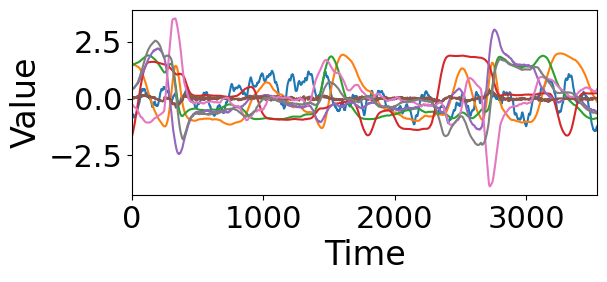

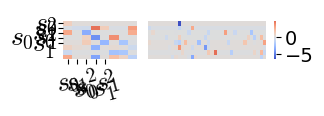

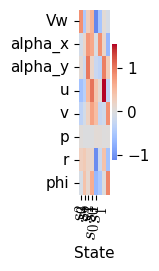

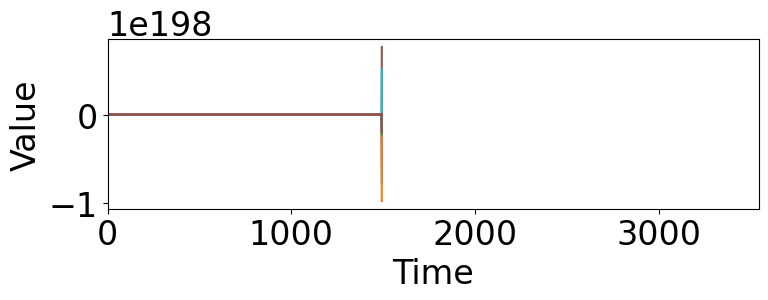

In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.stats
import seaborn as sns
import scipy
from model import NLDS, plot_result, make_data
from model.utils import make_feature_names
import pandas as pd
import matplotlib.dates as mdates
%matplotlib inline

dataset_name = 'ship'
dir_path = f'./result/Latent/{dataset_name}'
fig_type = 'pdf'
fsize = 2.4
annot = False

model = pickle.load(open(f'{dir_path}/model.pickle', 'rb'))
w = scipy.stats.zscore(np.concatenate(((model.A - np.eye(model.k)), model.F), axis=1), axis=1)

data, setting = make_data(dataset_name)
xticklabels = ['$s_0$','$s_1$','$s_0^2$','$s_0s_1$', '$s_1^2$'] #make_feature_names(model.k, model.dim_poly)
yticklabels = setting['yticklabels']
print(yticklabels)
slabels=xticklabels
vmin = np.min(w) - 0.1
vmax = np.max(w) + 0.1

df = pd.DataFrame(data=data, columns=yticklabels)
plt.rcParams["font.size"] = 22
fig, ax = plt.subplots(figsize=(6.0, 2.4))
# fig.autofmt_xdate()
ax.plot(data)
# locator = mdates.AutoDateLocator(minticks=5, maxticks=7)
# formatter = mdates.ConciseDateFormatter(locator)
ax.set_xlim([0, len(data)])
ax.set_xticks([0, 1000, 2000, 3000])
# ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/org.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 14
size = 20
plt.rcParams['mathtext.fontset'] = 'cm'
fig, (ax1, ax2) = plt.subplots(1, 2, 
                                gridspec_kw=dict(width_ratios=[1,2], height_ratios=[1], wspace=0.1, hspace=0.3),
                                figsize=(3.0, 0.5))
sns.heatmap(w[:,:model.k], 
            xticklabels=slabels[:model.k],
            yticklabels=slabels[:model.k], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
# ax1.set_ylabel("LHS", fontsize=14)
# ax1.set_xlabel("RHS", fontsize=14)
ax1.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax1.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax1.tick_params(pad=0.5)

sns.heatmap(w[:,model.k:], 
            xticklabels=slabels[model.k:],
            yticklabels=[], vmin=vmin, vmax=vmax, 
            cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot)
ax2.tick_params(axis = 'x', labelrotation = 15, labelsize=size)
ax2.tick_params(axis = 'y', labelrotation = 0, labelsize=size)
ax2.tick_params(pad=0.5)
fig.savefig(f"./{dir_path}/st_weight_3_1.{fig_type}", bbox_inches='tight', pad_inches=0.1)

plt.rcParams["font.size"] = 11
plt.rcParams['mathtext.fontset'] = 'cm'
plt.figure(figsize=(0.5, fsize))
sns.heatmap(model.C, 
            xticklabels=xticklabels[:model.k], 
            yticklabels=yticklabels, 
            cmap='coolwarm', fmt ='1.1e', center=0.0)
plt.xticks(fontsize = 15)
plt.xlabel("State")
plt.savefig(f"./{dir_path}/group.{fig_type}", bbox_inches='tight', pad_inches=0.1)

Sta, Obs = model.gen()
plt.rcParams["font.size"] = 24
data_no_noise, setting = make_data(dataset_name, noise_ratio=0.0)
fig, ax = plt.subplots(figsize=(8.4, 2.2))
# ax.plot(data_no_noise, figure=fig, color='lightgrey', linewidth=5)
# ax.plot(model.Ez)
ax.plot(Sta)
ax.plot(Obs)
ax.set_xlim(0, len(data)-1)
ax.set_xlabel("Time", fontsize=24)
ax.set_ylabel("Value", fontsize=24)
fig.savefig(f"{dir_path}/state.{fig_type}", bbox_inches='tight', pad_inches=0.1)


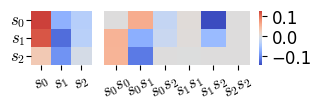

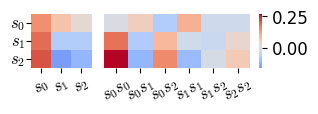

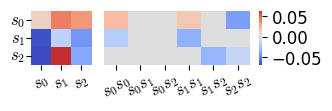

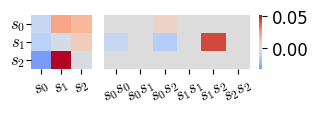

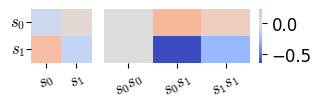

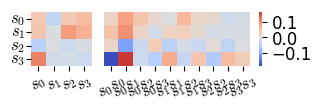

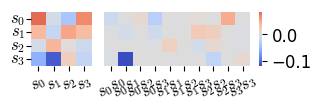

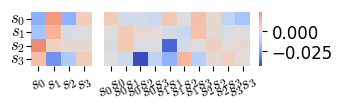

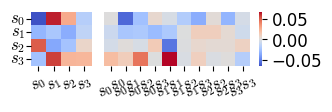

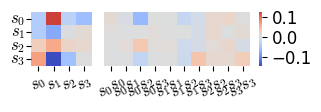

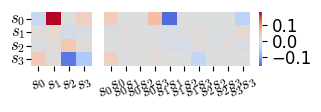

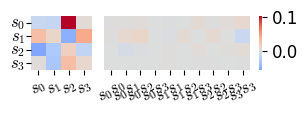

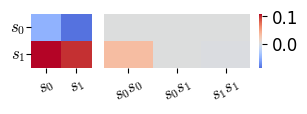

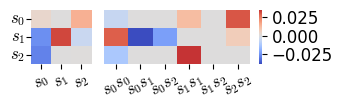

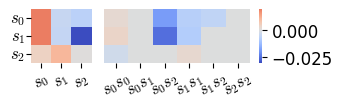

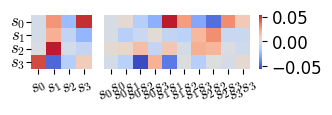

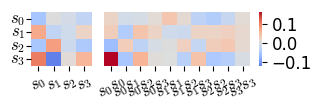

In [35]:
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import model.tool as tl
from model.utils import make_feature_names
%matplotlib inline
fsize = 3.3
annot = False

with open('./result/forecast/mocap_21_01/MDBH.pickle', mode='rb') as f:
    MDBH = pickle.load(f)

for md in MDBH[0]: 
    plt.rcParams["font.size"] = 12
    w = np.concatenate(((md.A - np.eye(md.k)), md.F), axis=1)
    vmin = np.min(w) #- 0.1
    vmax = np.max(w) #+ 0.1
    slabels = make_feature_names(md.k, md.dim_poly)
    fig, (ax1, ax2) = plt.subplots(1, 2, 
                                    gridspec_kw=dict(width_ratios=[1,3], height_ratios=[1], wspace=0.1, hspace=0.3),
                                    figsize=(fsize, 0.7))
    sns.heatmap(w[:,:md.k], 
                xticklabels=slabels[:md.k],
                yticklabels=slabels[:md.k], vmin=vmin, vmax=vmax,
                cmap='coolwarm', fmt ='1.1e', center=0.0, cbar=None, ax=ax1, annot=annot)
    ax1.tick_params(axis = 'x', labelrotation = 30)
    ax1.tick_params(axis = 'y', labelrotation = 0)
    ax1.tick_params(pad=0.5)

    sns.heatmap(w[:,md.k:], 
                xticklabels=slabels[md.k:],
                yticklabels=[], vmin=vmin, vmax=vmax,
                cmap='coolwarm', fmt ='1.1e', center=0.0, ax=ax2, annot=annot)
    ax2.tick_params(axis = 'x', labelrotation = 30)
    ax2.tick_params(axis = 'y', labelrotation = 0)
    ax2.tick_params(pad=0.5)
    plt.show()
    # plt.show()

['LaNoLem' 'MIOSR' 'SSR' 'STLSQ']
LaNoLem    30.0
MIOSR      28.0
SSR         6.0
STLSQ       7.0
dtype: float64
         Aizawa  Arneodo  Bouali2  BurkeShaw  Chen  ChenLee  Dadras  DequanLi  \
LaNoLem     2.0      1.0      1.0        4.0   4.0      2.0     4.0       4.0   
MIOSR       1.0      2.0      4.0        1.0   1.0      1.0     3.0       2.0   
SSR         4.0      4.0      2.0        3.0   3.0      3.0     2.0       1.0   
STLSQ       3.0      3.0      3.0        2.0   2.0      4.0     1.0       3.0   

         Finance  GenesioTesi  ...  SprottN  SprottO  SprottP  SprottQ  \
LaNoLem      1.0          1.0  ...      1.0      1.0      1.0      4.0   
MIOSR        2.0          2.0  ...      3.0      2.0      2.0      1.0   
SSR          4.0          4.0  ...      4.0      3.0      4.0      3.0   
STLSQ        3.0          3.0  ...      2.0      4.0      3.0      2.0   

         SprottR  SprottS  SprottTorus  VallisElNino  WangSun  ZhouChen  
LaNoLem      2.0      4.0          1

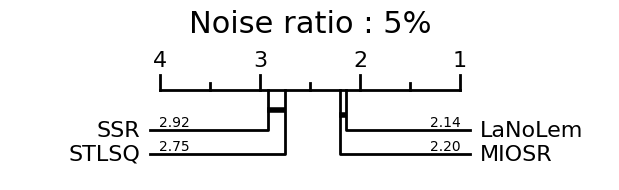

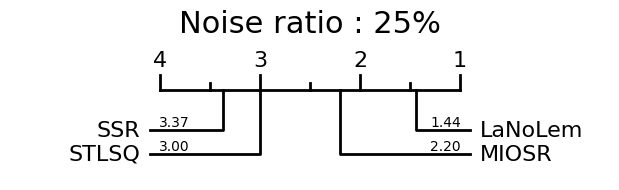

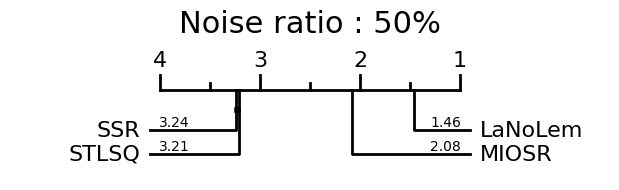

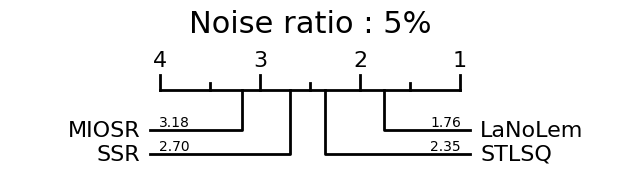

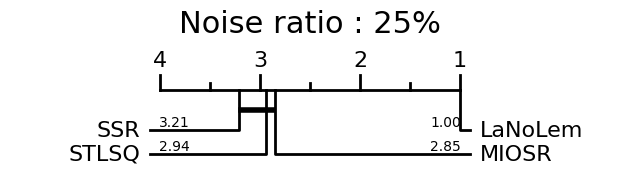

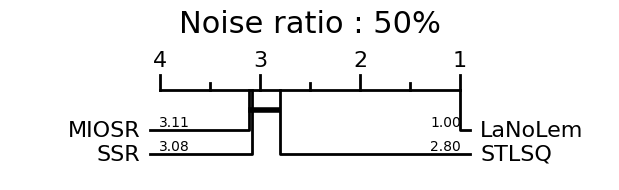

In [36]:
import pandas as pd
%matplotlib inline
# df_n = pd.read_csv('./result/SI/SI_Errs_method_Naive_20240729.csv')
df_n = pd.read_csv('./result/SI/SI_Errs_method_normal_20240804.csv')
df_l = pd.read_csv('./result/SI/SI_Errs_method_Lasso_20240804.csv')
df_ni = pd.read_csv('./result/SI/SI_Errs_method_Naive_20240804.csv')
df_stlsq = pd.read_csv('./result/SI/SI_Errs_STLSQ_20240730.csv')
df_ssr = pd.read_csv('./result/SI/SI_Errs_SSR_20240730.csv')
df_miosr = pd.read_csv('./result/SI/SI_Errs_MIOSR_20240730.csv')

# df = pd.concat([df_n, df_miosr, df_ssr, df_stlsq], axis=0)
df = pd.concat([df_n, df_miosr, df_ssr, df_stlsq], axis=0)

for cr, p in zip(['Coefficient error', 'Prediction error'], ['', '_p']):
    for n_r, noise_ratio in zip(['5', '25', '50'],[0.05, 0.25, 0.5]):
        df1 = df[(df['noise_ratio'] == noise_ratio)].reset_index(drop=True)

        # cr = 'Coefficient error'
        # cr = 'Prediction error'
        # cr = 'Prediction error (no noise)'
        # df.rename(columns={'data_name':'dataset'},inplace=True)
        # df1 = df.copy()
        # df['data_name'] = 0
        # i = 0
        # for key, grp in df1.groupby(['seed', 'dataset']):
        #     df.loc[((df['seed'] == key[0]) & (df['dataset'] == key[1])),  ['data_name']] = i
        #     i+= 1
        # df1 = df.drop(['dataset','seed'], axis=1)
        # df1 = df1.loc[:, ['method', 'data_name', cr]]

        # cr = 'Prediction error'

        grp = df1.groupby(['data_name', 'method']).describe()[cr]
        # print(grp['mean'].reset_index())

        df1 = grp['mean'].reset_index()
        df1.rename(columns={'mean':cr},inplace=True)
        df1 = df1.loc[:, ['method', 'data_name', cr]]
        import tools
        tools.draw_cd_diagram(df_perf=df1, metrics=cr, m_type = 'min', save_dir='./test', fn = f'cd-diagram_{n_r}{p}', title=f'Noise ratio : {n_r}%', labels=True)

['LaNoLem' 'LaNoLem-L' 'LaNoLem-N']
LaNoLem      22.0
LaNoLem-L    30.0
LaNoLem-N    18.0
dtype: float64
           Aizawa  Arneodo  Bouali2  BurkeShaw  Chen  ChenLee  Dadras  \
LaNoLem       2.0      1.0      1.0        3.0   2.0      1.0     2.0   
LaNoLem-L     1.0      2.0      2.0        1.0   3.0      3.0     1.0   
LaNoLem-N     3.0      3.0      3.0        2.0   1.0      2.0     3.0   

           DequanLi  Finance  GenesioTesi  ...  SprottN  SprottO  SprottP  \
LaNoLem         3.0      1.0          1.0  ...      2.0      1.0      1.0   
LaNoLem-L       2.0      2.0          2.0  ...      1.0      2.0      2.0   
LaNoLem-N       1.0      3.0          3.0  ...      3.0      3.0      3.0   

           SprottQ  SprottR  SprottS  SprottTorus  VallisElNino  WangSun  \
LaNoLem        2.0      2.0      2.0          2.0           2.0      2.0   
LaNoLem-L      1.0      1.0      1.0          1.0           1.0      1.0   
LaNoLem-N      3.0      3.0      3.0          3.0           3.0  

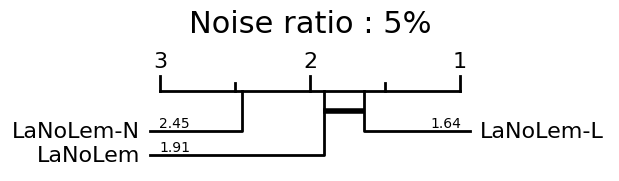

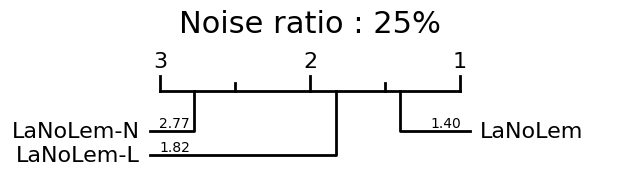

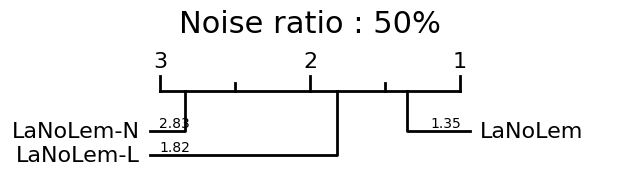

In [35]:
import pandas as pd
%matplotlib inline
# df_n = pd.read_csv('./result/SI/SI_Errs_method_Naive_20240729.csv')
df_n = pd.read_csv('./result/SI/SI_Errs_method_normal_20240804.csv')
df_l = pd.read_csv('./result/SI/SI_Errs_method_Lasso_20240804.csv')
df_ni = pd.read_csv('./result/SI/SI_Errs_method_Naive_20240804.csv')
df_stlsq = pd.read_csv('./result/SI/SI_Errs_STLSQ_20240730.csv')
df_ssr = pd.read_csv('./result/SI/SI_Errs_SSR_20240730.csv')
df_miosr = pd.read_csv('./result/SI/SI_Errs_MIOSR_20240730.csv')

# df = pd.concat([df_n, df_miosr, df_ssr, df_stlsq], axis=0)
df = pd.concat([df_n, df_l, df_ni], axis=0)

for cr, p in zip(['Coefficient error'], ['']):
    for n_r, noise_ratio in zip(['5', '25', '50'],[0.05, 0.25, 0.5]):
        df1 = df[(df['noise_ratio'] == noise_ratio)].reset_index(drop=True)

        # cr = 'Coefficient error'
        # cr = 'Prediction error'
        # cr = 'Prediction error (no noise)'
        # df.rename(columns={'data_name':'dataset'},inplace=True)
        # df1 = df.copy()
        # df['data_name'] = 0
        # i = 0
        # for key, grp in df1.groupby(['seed', 'dataset']):
        #     df.loc[((df['seed'] == key[0]) & (df['dataset'] == key[1])),  ['data_name']] = i
        #     i+= 1
        # df1 = df.drop(['dataset','seed'], axis=1)
        # df1 = df1.loc[:, ['method', 'data_name', cr]]

        # cr = 'Prediction error'

        grp = df1.groupby(['data_name', 'method']).describe()[cr]
        # print(grp['mean'].reset_index())

        df1 = grp['mean'].reset_index()
        df1.rename(columns={'mean':cr},inplace=True)
        df1 = df1.loc[:, ['method', 'data_name', cr]]
        import tools
        tools.draw_cd_diagram(df_perf=df1, metrics=cr, m_type = 'min', save_dir='./test', fn = f'cd-diagram_{n_r}{p}_ab', title=f'Noise ratio : {n_r}%', labels=True)

In [31]:
import pandas as pd
%matplotlib inline
df_n = pd.read_csv('./result/SI/SI_Errs_method_normal_20240804.csv')
df_l = pd.read_csv('./result/SI/SI_Errs_method_Lasso_20240804.csv')
df_ni = pd.read_csv('./result/SI/SI_Errs_method_Naive_20240804.csv')
df_stlsq = pd.read_csv('./result/SI/SI_Errs_STLSQ_20240730.csv')
df_ssr = pd.read_csv('./result/SI/SI_Errs_SSR_20240730.csv')
df_miosr = pd.read_csv('./result/SI/SI_Errs_MIOSR_20240730.csv')



df = pd.concat([df_n, df_l, df_ni, df_miosr, df_ssr, df_stlsq], axis=0)

for n_r, noise_ratio in zip(['5', '25', '50'],[0.05, 0.25, 0.5]):
    df1 = df[(df['noise_ratio'] == noise_ratio)].reset_index(drop=True)
    import tools
    df1 = tools.make_table(df1, ['Prediction error', 'Coefficient error'], ['min', 'min'], './test',  fn = f'table_exp_{n_r}', title=f'Noise ratio : {n_r}\%', wrap=4, row_num=9, scale=0.7)

In [19]:
import numpy as np
matrix = [
    [1, 1, 3],
    [4, 1, 1],
    [1, 1, 9]
]
threshold = 5
np.any(np.all(np.abs(matrix) < threshold, axis=1))

True